# Instrucciones

Contamos con los datos de características acústicas de voz obtenidas de la base de datos de UCI Machine Learning.

Queremos predecir con base en las características acústicas la voz pertenece a la de un hombre o una mujer -label-. 

El conjunto de datos tiene las siguientes variables correspondiente a características acústicas de registros de voz: 

- meanfreq
- sd
- median
- Q25
- Q75
- IQR
- skew
- kurt
- sp.ent
- sfm
- mode
- centroid
- meanfun
- minfun
- maxfun
- meandom
- mindom
- maxdom
- dfrange
- modindx
- label: Etiqueta correspondiente a si la voz pertenece a una mujer -female- o a un hombre -male-

Para este laboratorio utiliza el random seed de numpy 200831.
La etiqueta positiva corresponde a la etiqueta -male-.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(200831)

## EDA

In [3]:
voice_dataset = pd.read_csv('https://raw.githubusercontent.com/chavamoon/MachineLearningExamples/main/Python/voice.csv')

In [4]:
voice_dataset.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
voice_dataset.rename(columns={col: col.lower() for col in voice_dataset.columns.values}, inplace=True)
voice_dataset

,meanfreq,sd,median,q25,q75,iqr,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [6]:
voice_dataset.dtypes

meanfreq    float64
sd          float64
median      float64
q25         float64
q75         float64
iqr         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [7]:
voice_dataset.isna().sum()

meanfreq    0
sd          0
median      0
q25         0
q75         0
iqr         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

## Training

### split data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = voice_dataset.drop(['label'], axis=1)
y = voice_dataset[['label']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [11]:
print('Shape of training data:\n X:', X_train.shape,'y: ', y_train.shape)
print('Shape of testing data \n X:', X_test.shape, 'y:', y_test.shape)

Shape of training data:
 X: (2217, 20) y:  (2217, 1)
Shape of testing data 
 X: (951, 20) y: (951, 1)


### Training

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf = RandomForestClassifier()
grid =  {'n_estimators': [700, 800, 1000], 
        'criterion': ["gini", "entropy"], "min_samples_leaf": [5, 7, 9, 11]}
gs = GridSearchCV(rf, param_grid=grid, cv=10, scoring="accuracy", n_jobs=-1)

In [22]:
gs.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [5, 7, 9, 11],
                         'n_estimators': [700, 800, 1000]},
             scoring='accuracy')

In [25]:
# Mejor modelo
besto_model = gs.best_estimator_
besto_model

RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       n_estimators=1000)

In [26]:
# Mejor score del mejor estimador
gs.best_score_

0.9810606987077575

In [42]:
#Feautre Importances
feature_importances = pd.DataFrame.from_dict({ 'feature': X.columns.values, 'importance': besto_model.feature_importances_ })
feature_importances.sort_values(by = 'importance', ascending=False).head(3)

,feature,importance
12,meanfun,0.404097
5,iqr,0.171846
3,q25,0.111122


## Predictions

In [40]:
y_predicted_labels = besto_model.predict(X_test)

In [43]:
y_predicted_scores = besto_model.predict_proba(X_test)

In [49]:
#Última predicción
print('Label: ',y_predicted_labels[-1], ',Probability:', y_predicted_scores[-1])

Label:  female ,Probability: [0.89072331 0.10927669]


## Metrics

In [51]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

%matplotlib inline

In [52]:
#Accuracy
accuracy_score(y_test, y_predicted_labels)

0.9684542586750788

In [56]:
#AUC
auc = roc_auc_score(y_test, y_predicted_scores[:,1])
auc

0.9961519408371962

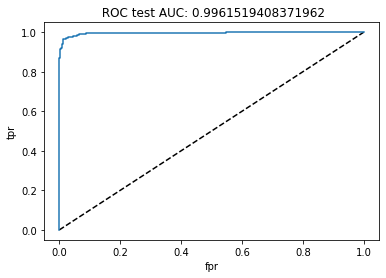

In [69]:

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test.values, y_predicted_scores[:,1], pos_label="male")

plt.clf()
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.title(" ROC test AUC: " + str(auc))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

#### Punto de corte para que no tengamos más de 1% de falsos positivos, logrando la mayor cantidad de verdaderos positivos


In [78]:
df_roc_metrics = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})
roc_less_than_tfp_1percent = df_roc_metrics[df_roc_metrics.fpr < .01].sort_values(by=['fpr','tpr'], ascending=False)
roc_less_than_tfp_1percent

,fpr,tpr,thresholds
12,0.008475,0.941545,0.809788
11,0.008475,0.922756,0.845982
10,0.006356,0.922756,0.846730
9,0.006356,0.916493,0.857281
8,0.004237,0.916493,0.858627
7,0.004237,0.914405,0.859412
6,0.002119,0.914405,0.861554
5,0.002119,0.870564,0.916743
4,0.000000,0.870564,0.919835
3,0.000000,0.039666,0.999833


In [79]:
punto_corte = roc_less_than_tfp_1percent.head(1)
punto_corte

,fpr,tpr,thresholds
12,0.008475,0.941545,0.809788


#### Precision curve

In [81]:
from sklearn.metrics import precision_recall_curve

In [101]:
precision, recall, threshold = precision_recall_curve(y_test, y_predicted_scores[:,1], pos_label="male")
thresholds_ = np.append(threshold, 1)
precision_recall = pd.DataFrame({'precision': precision, 'recall': recall, 'thresholds': thresholds_})
tpr_fpr = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds})
metrics = tpr_fpr.merge(precision_recall, how="inner", on="thresholds")
metrics

,tpr,fpr,thresholds,precision,recall
0,0.029228,0.000000,1.000000,1.000000,0.029228
1,0.029228,0.000000,1.000000,1.000000,0.000000
2,0.035491,0.000000,0.999833,1.000000,0.035491
3,0.039666,0.000000,0.999833,1.000000,0.039666
4,0.870564,0.000000,0.919835,1.000000,0.870564
5,0.870564,0.002119,0.916743,0.997608,0.870564
6,0.914405,0.002119,0.861554,0.997722,0.914405
7,0.914405,0.004237,0.859412,0.995455,0.914405
8,0.916493,0.004237,0.858627,0.995465,0.916493
9,0.916493,0.006356,0.857281,0.993213,0.916493


In [103]:
metrics[metrics.fpr < 0.01]

,tpr,fpr,thresholds,precision,recall
0,0.029228,0.000000,1.000000,1.000000,0.029228
1,0.029228,0.000000,1.000000,1.000000,0.000000
2,0.035491,0.000000,0.999833,1.000000,0.035491
3,0.039666,0.000000,0.999833,1.000000,0.039666
4,0.870564,0.000000,0.919835,1.000000,0.870564
5,0.870564,0.002119,0.916743,0.997608,0.870564
6,0.914405,0.002119,0.861554,0.997722,0.914405
7,0.914405,0.004237,0.859412,0.995455,0.914405
8,0.916493,0.004237,0.858627,0.995465,0.916493
9,0.916493,0.006356,0.857281,0.993213,0.916493


In [106]:
# punto de corte
print(punto_corte.thresholds.values[0])
labels_punto_corte = ["male" if prediction >= punto_corte.thresholds.values[0] else "female" 
                      for prediction in y_predicted_scores[:,1]]

0.8097883758870986


In [108]:
#Matriz de confusión

confusion_matrix(y_test, labels_punto_corte)

array([[468,   4],
       [ 28, 451]], dtype=int64)